In [ ]:
# !pip install qiskit

In [ ]:
# !pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=8175746acff89f37482f7a5166bee32f8c6d715ae40cef3b00c01b3925061931
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [ ]:
!pip list | grep qiskit

qiskit                                   0.45.2
qiskit-machine-learning                  0.6.1
qiskit-terra                             0.45.2


In [ ]:
import warnings
warnings.filterwarnings('ignore')

### **ZZFeature Map Unitary**

---


**General Setup**

<br>
Let the input feature vector be:
$$x = (x_0, x_1, \ldots, x_{n-1})$$

The feature map uses single-qubit $Z$ rotations and two-qubit $ZZ$ rotations.

---

**1. General Unitary Without Hadamards**

The unitary operator $U_{\Phi(x)}$ is defined as:

$$U_{\Phi(x)} = \left( \prod_{i=0}^{n-1} e^{i\, x_i\, Z_i} \right) \left( \prod_{0 \le i < j \le n-1} e^{i\,(\pi - x_i)(\pi - x_j)\, Z_i Z_j} \right)$$

<br>

**First term: single-qubit RZ rotations**
$$\prod_{i=0}^{n-1} e^{i\, x_i\, Z_i}$$
This is equivalent to applying:
$$RZ(x_i) = e^{i\,x_i Z}$$
on each qubit.

<br>

**Second term: pairwise entangling RZZ rotations**
$$\prod_{i < j} e^{i\, (\pi - x_i)(\pi - x_j)\, Z_i Z_j}$$
This applies:
$$RZZ\big((\pi - x_i)(\pi - x_j)\big)$$
to every pair of qubits $(i,j)$.

---

**2. Full Feature Map Including Hadamards**

The complete unitary used in QSVM or ZZFeatureMap is:

$$U(x) = U_{\Phi(x)} \; H^{\otimes n}$$

Explicitly:

$$U(x) = \left[ \left( \prod_{i=0}^{n-1} e^{i\, x_i\, Z_i} \right) \left( \prod_{i < j} e^{i\,(\pi - x_i)(\pi - x_j)\, Z_i Z_j} \right) \right] H^{\otimes n}$$

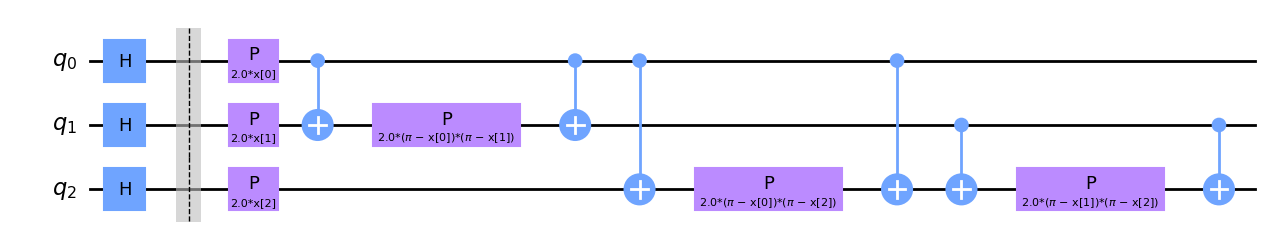

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw('mpl')

### **ZFeatureMap — General Formula**

---


ZFeatureMap is simpler: it only uses $RZ$ rotations, no entanglement.

---

<br>

**1. Unitary (no entanglement)**

$$U_{\text{Z}}(x) = \prod_{i=0}^{n-1} e^{i\,x_i\, Z_i}$$

This is equivalent to applying **RZ rotations**:

$$RZ(x_i) = e^{i x_i Z}$$

on each qubit.

<br>

**2. Full ZFeatureMap (with Hadamards)**

$$U_{\text{Z}}(x) = \left( \prod_{i=0}^{n-1} e^{i\,x_i Z_i} \right) H^{\otimes n}$$

---


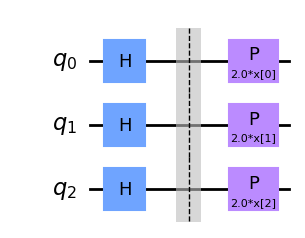

In [ ]:
from qiskit.circuit.library import ZFeatureMap
qz_z = ZFeatureMap(3, reps=1, insert_barriers=True)
qz_z.decompose().draw('mpl')


### **Two-Local Feature Map — General Unitary**

---


The Two-Local ansatz used in VQAs has:
* Local single-qubit rotation layer
* Entangling layer
* Repeated for multiple reps

This creates a general expressive circuit, not a strict data-encoding map, but its unitary form is defined below.

---

<br>

**1. Define rotation layer**
<br>(Local rotations on each qubit)

$$U_{\text{rot}}(\boldsymbol{\theta}) = \prod_{i=0}^{n-1} R_{\alpha_i}(\theta_i)$$

Typically $\alpha_i \in \{X, Y, Z\}$.

---

<br>

**2. Define entangling layer**
<br>For a set of entangling pairs $E$:

$$U_{\text{ent}}(\boldsymbol{\theta}) = \prod_{(i,j)\in E} R_{\beta}(\theta_{ij})$$

**Common choices:**
* $\beta = ZZ$
* $\beta = XX$
* $\beta = CX$ (controlled-X)

---

<br>

**3. Two-Local General Repeated Structure**
<br>If there are $L$ repetitions:

$$U_{\text{TwoLocal}}(\boldsymbol{\theta}) = \prod_{k=1}^{L} \left[ U_{\text{ent}}(\boldsymbol{\theta}^{(k)}) \; U_{\text{rot}}(\boldsymbol{\theta}^{(k)}) \right]$$

---

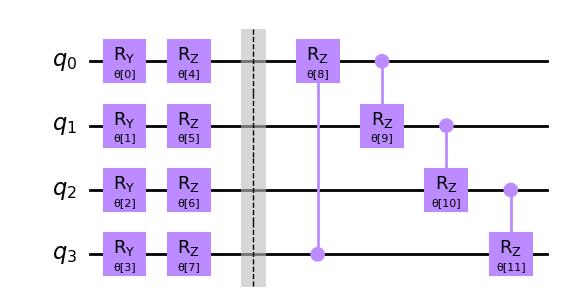

In [ ]:
from qiskit.circuit.library import TwoLocal
qc_twoLocal = TwoLocal(
    num_qubits=4,
    reps=1,
    rotation_blocks=['ry', 'rz'],
    entanglement_blocks='crz',
    entanglement='sca',
                              # full, linear, circular / sca
    skip_final_rotation_layer=True,
    insert_barriers=True
)

qc_twoLocal.decompose().draw('mpl')


### **General NLocal Unitary**

---


The **NLocal ansatz** consists of:
* A sequence of rotation layers
* A sequence of entangling layers
* Arbitrary ordering
* Arbitrary number of repetitions

---

<br>

**General Setup**
Let the number of qubits be:
$$n \in \mathbb{N}$$

Let the number of repetitions be:
$$L$$

Let the local rotations on qubit $i$ in layer $k$ be parameterized by angles $\theta^{(k)}_i$.

Let entangling gates between qubits $(i,j)$ in layer $k$ be parameterized by $\lambda^{(k)}_{ij}$.

---

<br>

**1. Rotation Layer**
<br>Each rotation layer acts independently on each qubit:

$$U_{\text{rot}}^{(k)} = \prod_{i=0}^{n-1} R_{\alpha_i}\left(\theta^{(k)}_{i}\right)$$

Where:
$$R_{\alpha_i} \in \{R_X, R_Y, R_Z, U_3, U_1U_2U_3\}$$

* Angles $\theta^{(k)}_{i}$ are trainable parameters.

---

<br>

**2. Entangling Layer**
<br>Let $E$ be the set of entangling pairs specified by the topology (linear, full, circular, etc.):

$$E \subseteq \{(i,j)\ |\ 0 \le i < j < n \}$$

The entangling layer is:

$$U_{\text{ent}}^{(k)} = \prod_{(i,j) \in E} G_{\beta}\left(\lambda^{(k)}_{ij}\right)$$

Where:
$$G_{\beta} \in \{CX, CZ, RZZ(\cdot), RXX(\cdot), RYY(\cdot)\}$$

This includes:
* Controlled gates (no parameter)
* Parametrized gates like $RZZ(\lambda)$

---

<br>

**3. Full NLocal Circuit (General Form)**



If the structure repeats for $L$ layers:

$$U_{\text{NLocal}}(\Theta) = \prod_{k=1}^{L} \left[ U_{\text{ent}}^{(k)}\; U_{\text{rot}}^{(k)} \right]$$

Where:
$$\Theta = \{\theta^{(k)}_i,\; \lambda^{(k)}_{ij}\}$$

This is the most general expression for any NLocal ansatz in Qiskit.

---


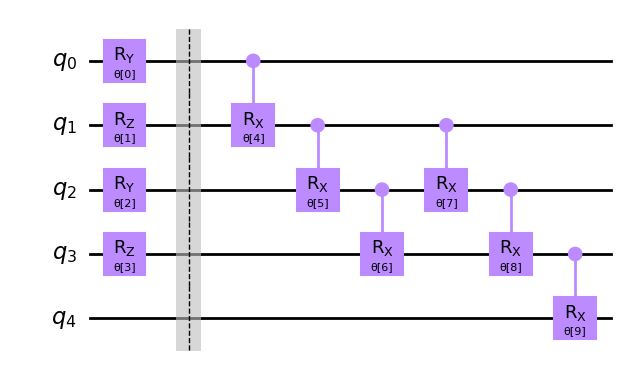

In [ ]:
from qiskit.circuit.library import NLocal
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

# custom rotation blocks
rot = QuantumCircuit(2)
params = ParameterVector('theta', 2)
rot.ry(params[0], 0)
rot.rz(params[1], 1)

# custom entanglement blocks
ent = QuantumCircuit(4)
params = ParameterVector('lambda', 4)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)

qc_nlocal = NLocal(
    num_qubits=5,
    rotation_blocks=rot,
    entanglement_blocks=ent,
    entanglement='linear',
    reps=1,
    skip_final_rotation_layer=True,
    insert_barriers=True
)
qc_nlocal.decompose().draw('mpl')